<a href="https://colab.research.google.com/github/BuiChiCuongs/BT_AI_W9_Cifar/blob/main/AI_W9_Cifar10_31_3_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x=x_test
y=y_test

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

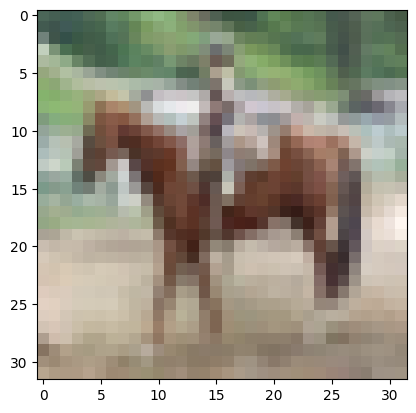

So nay la:  [7]


In [ ]:
digit = x_train[2807]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print('So nay la: ', y_train[2807])

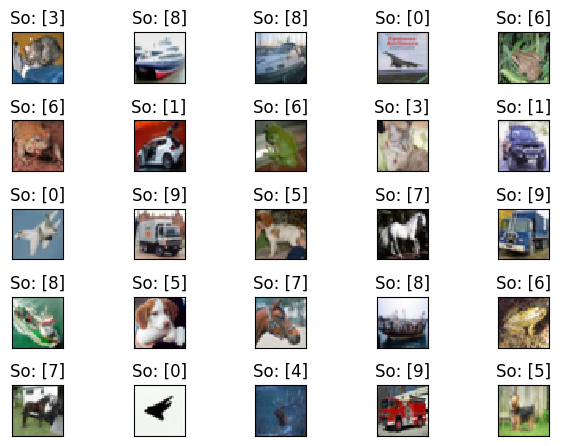

In [ ]:
for i in range(25):
  plt.subplot(5,5,i+1)  #ve hinh co 5hang 5cot, i+1: vi tri tuong tac
  plt.tight_layout()
  plt.imshow(x_test[i],cmap='gray',interpolation='none')
  plt.title('So: {}'.format(y_test[i])) # gan nhan cho so
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(1000,activation = 'relu', input_shape = (3072,))) 
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(10, activation = 'Softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 3,083,010
Trainable params: 3,083,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape(50000, 32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000, 32*32*3)
x_test = x_test.astype('float32')/255

In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
x_test.shape

(10000, 3072)

In [ ]:
from keras.utils import to_categorical        #chuyen du lieu ve 1 va 0
y_train = to_categorical(y_train, 10)  
y_test = to_categorical(y_test, 10)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size=300)  

Epoch 1/10
167/167 [==============================] - 19s 108ms/step - loss: 2.0646 - accuracy: 0.2484
Epoch 2/10
167/167 [==============================] - 18s 106ms/step - loss: 1.9338 - accuracy: 0.3025
Epoch 3/10
167/167 [==============================] - 19s 113ms/step - loss: 1.8866 - accuracy: 0.3211
Epoch 4/10
167/167 [==============================] - 18s 106ms/step - loss: 1.8500 - accuracy: 0.3376
Epoch 5/10
167/167 [==============================] - 18s 111ms/step - loss: 1.8276 - accuracy: 0.3480
Epoch 6/10
167/167 [==============================] - 31s 186ms/step - loss: 1.8029 - accuracy: 0.3566
Epoch 7/10
167/167 [==============================] - 21s 126ms/step - loss: 1.7850 - accuracy: 0.3642
Epoch 8/10
167/167 [==============================] - 22s 130ms/step - loss: 1.7694 - accuracy: 0.3717
Epoch 9/10
167/167 [==============================] - 18s 107ms/step - loss: 1.7570 - accuracy: 0.3727
Epoch 10/10
167/167 [==============================] - 19s 111ms/step - l

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Mat mat: ', test_loss)
print('Do chinh xac:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 1.6108 - accuracy: 0.4276
Mat mat:  1.6107839345932007
Do chinh xac: 0.4275999963283539


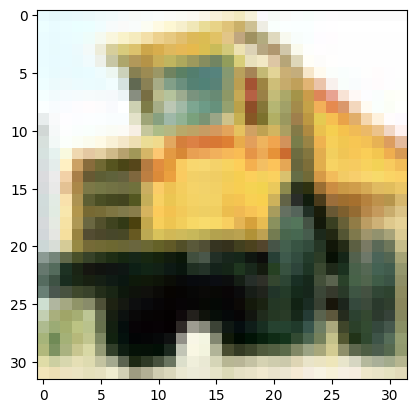

[9]


In [ ]:
img = x[400]
plt.imshow(img)
plt.show()
print(y[400])

In [ ]:
X_pred = x[400].reshape(1,32*32*3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 25ms/step


array([9])

In [ ]:
# SAVE MODEL: cifar10_model.h5
model.save('cifar10_model.h5')

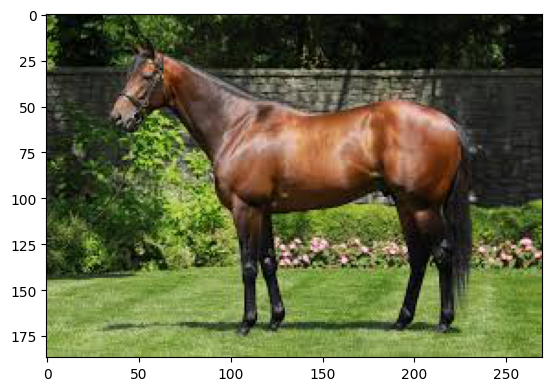

In [ ]:
url = '/content/horse.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

In [ ]:
from keras.utils import load_img, img_to_array

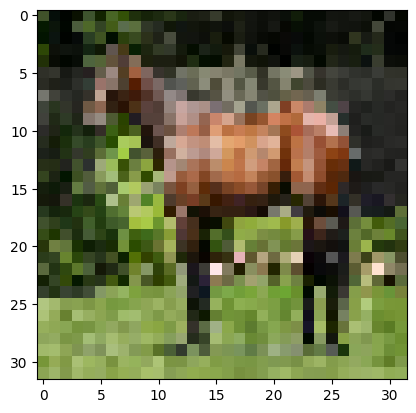

In [ ]:
img = load_img(url, target_size = (32,32))
plt.imshow(img)

In [ ]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 26ms/step


array([7])